$\Large\text{The Quantum Harmonic Oscillator}$

In classical mechanics, an oscillator is governed by Hooke's Law, $F = -kx$ = ma, where $k$ is a constant. Solving this equation yields $x(t) = A\cos{(\omega t + \phi)}$, where $\omega = \sqrt{\frac{k}{m}}$. The potential energy, $V(x)$, of this system is given by,
\begin{equation*}
    V(x) = \frac{1}{2}kx^2 = \frac{1}{2}m\omega^2x^2.
\end{equation*}
The idea behind the quantum harmonic oscillator is to solve the time independent Schrödinger equation for this potential energy. That is,
\begin{equation*}
    E\psi(x) = \hat{H}\psi(x)=\frac{\hat{p}^2}{2m}\psi(x) + \frac{1}{2}m\omega^2 x^2\psi(x). \ \ \ \ (1)
\end{equation*}

Before continuing, why even bother investigating this potential? Well, consider the Taylor expansion for an arbitrary potential $V(x)$ around the position $x_0$,
\begin{equation*}
    V(x) = V(x_0) + V'(x_0) (x-x_0) + \frac{1}{2}V''(x_0)(x-x_0)^2 + \ldots 
\end{equation*}
If the only part of $V(x)$ that is of interest is the region around a local minimum, then $V'(x_0) = 0$. Then, near $x_0$, higher order terms will be negligable, and $V(x)$ can be approximated,
\begin{equation*}
    V(x) \approx V(x_0) + \frac{1}{2}V''(x_0)(x-x_0)^2
\end{equation*}
So for small $x$ values around a local minumum, any potential looks like the potential for a harmonic oscillator. An important application of this is to bonds between atoms in a molecule. The potential energy in a bond between two atoms is well modeled by the Morse potential,
\begin{equation*}
    V(x) = D_e\left(1- e^{-a(x-x_0)}\right)^2.
\end{equation*}
Where, $D_e = V(x = \infty)$ and $a$ describes the "width" of the potential. A comparison of this with the harmonic oscillator is shown below for Nitrogen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c
plt.rcParams['text.usetex'] = True
def morse(x, D_e, a, x_0):
    return D_e * (1-np.exp(-a*(x-x_0)))**2
def osc(x,a, x_0):
    return a*(x-x_0)**2

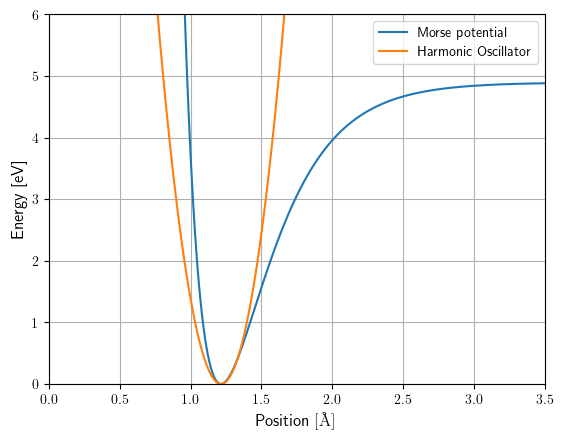

In [33]:
xs = np.linspace(0, 5, 1000)
V_m = morse(xs, 4.894,2.92,1.215)
V_o = osc(xs, 30,1.215)
plt.plot(xs, V_m)
plt.plot(xs, V_o)
plt.ylim(0,6)
plt.xlim(0,3.5)
plt.grid(True)
plt.ylabel(r"Energy [eV]", fontsize = 12)
plt.xlabel(r"Position $[\rm \r{A}]$", fontsize = 12)
plt.legend([r"Morse potential", r"Harmonic Oscillator"])

For small deviations around the equillibrium position, the potential is very similar to that of the harmonic oscillator. 

Returning to Equation 1, this can be solved analytically, using algebraic tricks. Rearranging Equation 1 (and writing $\psi(x)$ as $\psi$ from here on out),
\begin{equation*}
    E\psi = \frac{1}{2m}\left[ \hat{p}^2 + (m \omega x)^2\right]\psi. \ \ \ \ (2)
\end{equation*}
The trick is to "factor" the bracketed term. However, doing this is not as simple as factoring numbers (i.e. $a^2 + b^2 = (a + bi)(a - bi)$) since instead it is operators being factored. To begin, define the operators $\hat{a}_+$ and $\hat{a}_-$ such that,
\begin{equation*}
    \hat{a}_\pm \equiv \frac{1}{\sqrt{2\omega \hbar m}}(\mp i\^p + m\omega x).
\end{equation*}

This method of factoring is slightly misleading, since $\hat{a}_+\hat{a}_-$ will not, in general, be equal to $\hat{a}_-\hat{a}_+$ That is, the operators may not necessarily "commute". This prompts evaulating $\hat{a}_+$ and $\hat{a}_-$'s commutator, defined for two operators as,
\begin{equation*}
\left[ \hat{A}, \hat{B}\right] = \hat{A}\hat{B}- \hat{B}\hat{A}.
\end{equation*}
Starting with $\hat{a}_+\hat{a}_-$,
\begin{equation*}
    \hat{a}_+\hat{a}_-= \frac{1}{2\hbar m\omega}(-i\hat{p} + m\omega x)(i\hat{p} + m\omega x)=\frac{1}{2\hbar m\omega}\left[  \hat{p}^2 + (m \omega x)^2 - i m \omega \red{(\hat{p}x - x\hat{p} )}\right].
\end{equation*}

The term highlighted in red can be recognized as the the commutator of $\hat{p}$ and $x$, $[\hat{p}, x]$. This is refered to as the Canonical Commutation Relation, and is equal to $-i\hbar$. Therefore, 
\begin{equation*}
    \hat{a}_+\hat{a}_-=\frac{1}{2\hbar m\omega}\left[  \hat{p}^2 + (m \omega x)^2 - i m \omega (-i\hbar)\right] = \frac{1}{2\hbar m\omega}\left[  \hat{p}^2 + (m \omega x)^2 \right] - \frac{1}{2} = \frac{1}{\hbar \omega}\hat{H} - \frac{1}{2}.
\end{equation*}
And, following the same method,
\begin{equation*}
    \hat{a}_-\hat{a}_+ =  \frac{1}{\hbar \omega}\hat{H} + \frac{1}{2}.
\end{equation*}
So,
\begin{equation*}
    [\hat{a}_-, \hat{a}_+] = 1.
\end{equation*}

Now, the Hamiltonian can be rewritten as, 
\begin{equation*}
    \hat{H} = \hbar \omega (\hat{a}_+ \hat{a}_- + \frac{1}{2}).
\end{equation*}
This allows the time independent Schrödinger equation to be re-written,
\begin{equation*}
    E\psi = \hbar \omega (\hat{a}_+ \hat{a}_- + \frac{1}{2})\psi \ \ \ \ \ \ (3)
\end{equation*}

Suppose now, that some solution to this has been found, call it $\psi_1$ with energy $E_1$. Then, what is the effect of $\hat{a}_+$ on $\psi_1$? Substituting this into Equation 3,
$$
\begin{align*}
    \hat{H}(\hat{a}_+ \psi_1) &= \hbar \omega (\hat{a}_+ \hat{a}_- + \frac{1}{2})(\hat{a}_+ \psi_1) 
                              = \hbar \omega (\hat{a}_+ \hat{a}_-\hat{a}_+ + \frac{1}{2}\hat{a}_+) \psi_1 \\
                              &= \hat{a}_+\hbar \omega(\hat{a}_-\hat{a}_+ + \frac{1}{2}) \psi_1 =\hat{a}_+\hbar \omega(\frac{1}{\hbar \omega}\hat{H} + \frac{1}{2} + \frac{1}{2})\psi_1 \\
                              &= \hat{a}_+(E_1 + \hbar \omega)\psi_1 = (E_1 + \hbar \omega)\hat{a}_+\psi_1.
\end{align*}
$$

This is an important result. Acting $\hat{a}_+$ on any solution to Equation 2 with energy $E$, gives another solution with energy $E+\hbar \omega$. The same process can be used to show acting $\hat{a}_-$ on a state $\psi$ will give another valid solution with energy $E- \hbar \omega$.

Now, it's time to actually determine what the eigenstates look like. Since acting $\hat{a}_-$ on a state effectively lowers its energy by $\hbar \omega$, then there should be some minimum state $\psi_0$ such that,
\begin{align*}
    \hat{a}_-\psi_0 &= 0 \\
    \frac{1}{\sqrt{2\omega \hbar m}}( i\^p + m\omega x)\psi &= 0.
\end{align*}
Simplifying and rearranging,
\begin{equation*}
    \frac{d\psi_0}{dx} = -\frac{m\omega}{\hbar}x\psi_0.
\end{equation*}
Which has the general solution,
\begin{equation*}
 \psi_0 = Ae^{-\frac{m \omega}{2\hbar}x^2}.
\end{equation*}
To properly normalize, set $A = \sqrt{\frac{m\omega}{\pi \hbar}}$

So, the set of eigenstates has been found, 
\begin{equation*}
\psi_n = A_n (\hat{a}_+)^n e^{-\frac{m \omega}{2\hbar}x^2}.
\end{equation*}

These solutions can be rewritten in terms of the Hermite Polynomials, to get an analytic form without the presence of $\hat{a}_+$ or $\hat{a}_-$. That is,'
\begin{equation*}
    \psi_n (x) = \left( \frac{m\omega}{\pi \hbar}\right)^{1/4}\frac{1}{\sqrt{2^nn!}}H_n(\sqrt{\frac{m\omega}{\hbar}}x)e^{-\frac{m\omega x^2}{2\hbar}}.
\end{equation*}
Where, for reference, the Hermite Polynomials are,
\begin{equation*}
    H_n(x) = (-1)^n e^{x^2} \frac{d^n}{dx^n}e^{-x^2}
\end{equation*}

So what do these solutions actually look like?

In [18]:
from scipy.special import hermite, factorial
def psi_n(x,n):
    Hn = hermite(n)
    return ((1 / (2**n * factorial(n) * np.pow(np.pi, 1/4))) * Hn(x) * np.exp(-x**2 / 2))
def V(x):
    return (1/2)*(x**2)

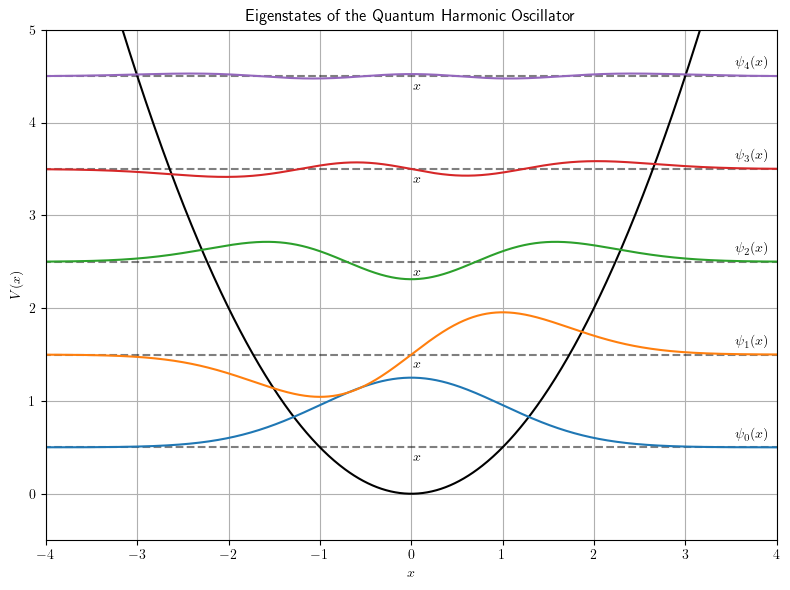

In [52]:
n_max = 4
x = np.linspace(-5,5, 1000)
plt.figure(figsize=(8, 6))
plt.plot(x, V(x), 'k', label='Potential')
for n in range( n_max + 1):
    offset = n + 0.5 #For spacing the wave functions apart vertically
    plt.plot(x, np.zeros_like(x)+ offset, linestyle = "--", c = "black", alpha = .5)
    psi = psi_n(x,n)
    plt.plot(x, psi  + offset, label=f"$n={n}$")
    plt.text(3.55, offset + .1,fr"$\psi_{{{n}}}(x)$")
    plt.text(0.02, offset - .15,r"$x$")
    

plt.xlabel(r"$x$")
plt.ylabel(r"$V(x)$")
plt.ylim(-0.5, n_max + 1)
plt.xlim(-4,4)
plt.title(r"Eigenstates of the Quantum Harmonic Oscillator")
plt.grid(True)
#plt.legend(loc = 2)
plt.tight_layout()
plt.show()

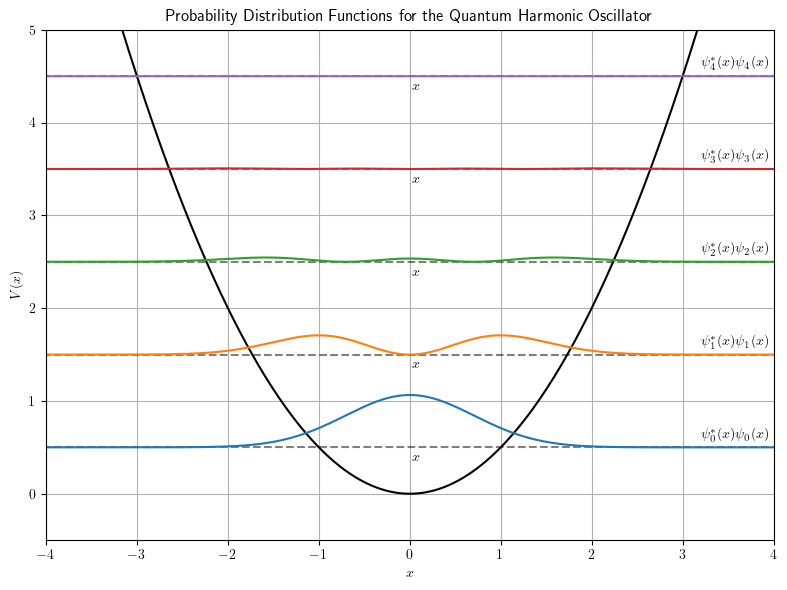

In [53]:
x = np.linspace(-5,5, 1000)
plt.figure(figsize=(8, 6))
plt.plot(x, V(x), 'k', label='Potential')
for n in range( n_max + 1):
    offset = n + 0.5 #For spacing the wave functions apart vertically
    plt.plot(x, np.zeros_like(x)+ offset, linestyle = "--", c = "black", alpha = .5)
    psi = psi_n(x,n)
    plt.plot(x, psi * psi + offset, label=f"$n={n}$")
    plt.text(3.2, offset + .1,fr"$\psi_{{{n}}}^*(x)\psi_{{{n}}}(x)$")
    plt.text(0.02, offset - .15,r"$x$")
    

plt.xlabel(r"$x$")
plt.ylabel(r"$V(x)$")
plt.ylim(-0.5, n_max + 1)
plt.xlim(-4,4)
plt.title(r"Probability Distribution Functions for the Quantum Harmonic Oscillator")
plt.grid(True)
#plt.legend(loc = 2)
plt.tight_layout()
plt.show()

Note that these plots were generated with the simplifying assumption that $m = \hbar = \omega = 1$. This results in $x$ and $V(x)$ being dimensionless. Effectively, the plots serve more as visualizations of what these wavefunctions and pdfs look like, as opposed to a precise representations.

References:

Griffiths, D. J., & Schroeter, D. F. (2018). Introduction to Quantum Mechanics. Cambridge University Press.

Konowalow, D. D., & Hirschfelder, J. O. (1961). Morse Potential Parameters for O–O, N–N, and N–O Interactions. In The Physics of Fluids (Vol. 4, Issue 5, pp. 637–642). AIP Publishing. https://doi.org/10.1063/1.1706374